## Problem Defination
When choosing a hotel for a vacation or trip, it is helpful to read reviews from people who have stayed there before in order to determine if the hotel's services will meet your expectations. However, it can be time-consuming to read through each individual review. Sentiment analysis is a way to quickly analyze a large number of reviews and determine the overall sentiment (positive or negative) expressed in them

## Hotel Reviews Sentiment Analysis
The dataset that I am using for the task of Hotel Reviews sentiment analysis is collected from Kaggle. It contains data about 20,000 reviews of people about the services of hotels they stayed in for a vacation, business trip, or any kind of trip. This dataset only contains two columns as Reviews and Ratings of the customers. So let’s get started with the task of Hotel Reviews sentiment analysis  by importing the necessary Python libraries and the dataset:

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

## Loading the data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Hotel review/Hotel_Reviews.csv.zip")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


This dataset is very large and luckily there are no missing values so without wasting any time let’s take a quick look at the distribution of customer ratings:

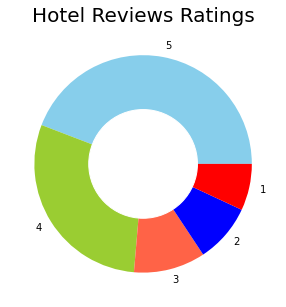

In [4]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

It can be seen that most of the guests rated the hotel services with 5 stars and 4 stars. So according to the above ratings, we can say that most of the guests are satisfied with the services of the hotel they stayed. Now let’s move forward by analyzing the sentiments of hotel reviews. To analyze the sentiment of the hotel reviews, I’ll add three additional columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [5]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
print(data.head())

                                              Review  Rating  Positive  \
0  nice hotel expensive parking got good deal sta...       4     0.285   
1  ok nothing special charge diamond member hilto...       2     0.189   
2  nice rooms not 4* experience hotel monaco seat...       3     0.219   
3  unique, great stay, wonderful time hotel monac...       5     0.385   
4  great stay great stay, went seahawk game aweso...       5     0.221   

   Negative  Neutral  
0     0.072    0.643  
1     0.110    0.701  
2     0.081    0.700  
3     0.060    0.555  
4     0.135    0.643  


According to the reviews, hotel guests seem satisfied with the services, now let’s take a look at how most people think about hotel services based on the sentiment of their reviews:

In [6]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


Thus, most people feel neutral about the hotel services. Now let’s take a closer look at sentiment scores:

In [7]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  6359.91000000002
Negative:  1473.4750000000038
Neutral:  12657.627999999937


Thus, according to the above results, more than 12,000 reviews are classified as neutral, more than 6,000 reviews are classified as positive. So it can be said that people are really happy with the services of the hotels they have stayed in as the negative reviews are below 1500

## Conclusion
This is how you can analyze the sentiments of hotel reviews. The best way to know if a hotel is right for you or not is to find out what people are saying about the hotel who have stayed there before. This is where the task of hotel reviews sentiment analysis can help you decide whether or not a hotel is suitable for your trip.